In [1]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader

from datetime import datetime
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('fivethirtyeight')
# style.use('ggplot')
style.use('seaborn')
%matplotlib inline

In [2]:
df_topix30 = pd.read_csv("../data/tse_topixcore30_20201030.csv")
df_topix30.head()

,日付,コード,銘柄名,市場・商品区分,33業種コード,33業種区分,17業種コード,17業種区分,規模コード,規模区分
0,20201030,3382,セブン＆アイ・ホールディングス,市場第一部（内国株）,6100,小売業,14,小売,1,TOPIX Core30
1,20201030,4063,信越化学工業,市場第一部（内国株）,3200,化学,4,素材・化学,1,TOPIX Core30
2,20201030,4452,花王,市場第一部（内国株）,3200,化学,4,素材・化学,1,TOPIX Core30
3,20201030,4502,武田薬品工業,市場第一部（内国株）,3250,医薬品,5,医薬品,1,TOPIX Core30
4,20201030,4503,アステラス製薬,市場第一部（内国株）,3250,医薬品,5,医薬品,1,TOPIX Core30


In [3]:
stocks_topix30 = df_topix30['コード'].values
stocks_topix30

array([3382, 4063, 4452, 4502, 4503, 4568, 6098, 6367, 6501, 6594, 6758,
       6861, 6954, 6981, 7203, 7267, 7741, 7974, 8001, 8031, 8058, 8306,
       8316, 8411, 8766, 9022, 9432, 9433, 9437, 9984])

In [4]:
st = '2015/1/1' # st = datetime(2015, 10, 30)
ed = '2019/12/31' # ed = datetime(2020, 10, 30)

symbols =  [str(s)+'.T' for s in stocks_topix30]
symbols.append('^N225')
symbols.append('TOPIX')

dfs = []
for symbol in symbols:
    df = pandas_datareader.data.DataReader(symbol, 'yahoo', st, ed)
    df = df.sort_values(by='Date',ascending=True)
    df = df.fillna(method='ffill') # 前営業日の値で埋める
    df = df[["Close"]].rename(columns={'Close': symbol})
    dfs.append(df)

df = pd.concat(dfs, axis=1)

In [5]:
display(df.head(3))
display(df.tail(3))

,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T,^N225,TOPIX
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.70
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.78
2015-01-05,4321.0,7888.0,4764.5,5000.0,1688.5,556.833008,1145.0,7816.0,4506.0,7868.0,...,4309.0,2010.0,3931.0,18005.0,1525.0,2532.330078,1752.5,3580.5,17408.710938,9.35


,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T,^N225,TOPIX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-27,4035.0,12220.0,9080.0,4364.0,1874.5,2426.330078,4144.0,15575.0,4610.0,15085.0,...,4065.0,1690.0,6160.0,22185.0,2747.0,3267.0,3049.0,4770.0,23837.720703,7.67
2019-12-30,4003.0,12060.0,9025.0,4332.0,1870.0,2409.330078,4099.0,15450.0,4626.0,15005.0,...,4038.0,1683.0,6119.0,22000.0,2757.0,3253.0,3038.0,4756.0,23656.619141,7.64
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.67


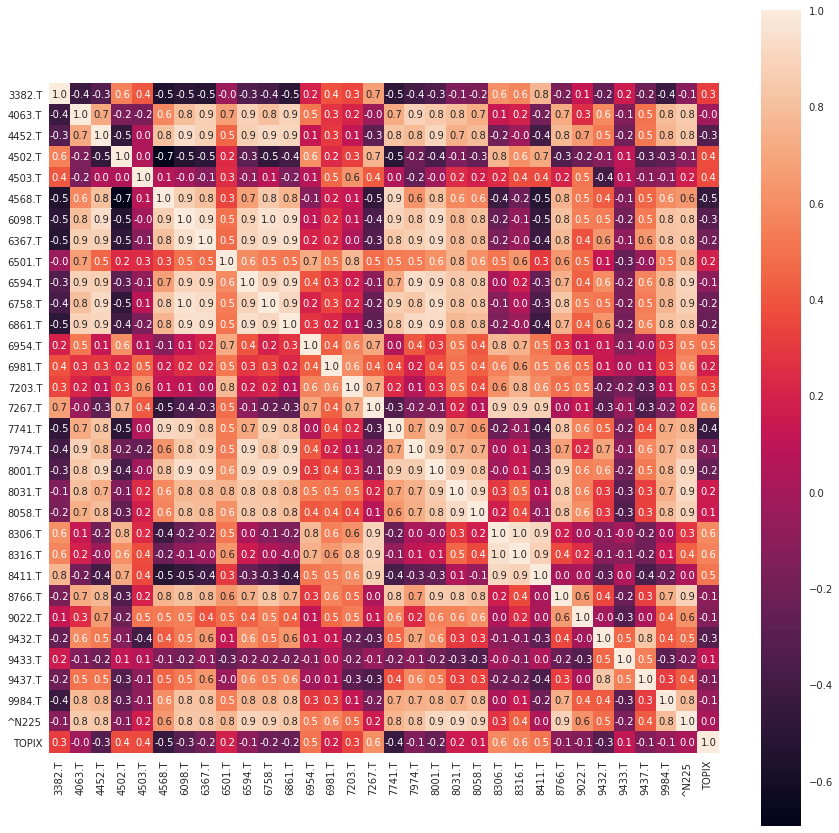

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, square=True, fmt='.1f')
plt.show()

In [7]:
def calc_cumulative_returns(df):
    """
    calculate cumulative returns
    """
    df = df.fillna(method='ffill').dropna()

    # 収益率(daily change)
    df_retday = df.pct_change()
    
    # 累積収益率 (cumulative returns)
    df_retcum = (1 + df_retday).cumprod()
    
    df_retcum = df_retcum.fillna(1.0)
    
    return df_retcum

In [8]:
df_retcum = calc_cumulative_returns(df)

display(df_retcum.head(3))
display(df_retcum.tail(3))

,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T,^N225,TOPIX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-06,0.982411,0.968813,0.973974,0.9822,0.990820,0.965580,0.998541,0.963664,0.968486,0.977123,...,0.976677,0.985075,0.955864,0.971952,0.997377,0.972357,0.988873,0.978774,0.969813,0.981818
2015-01-07,0.985767,0.976927,0.976073,0.9827,0.998816,0.975458,1.062594,0.969038,0.968375,0.976995,...,0.960432,0.980100,0.960951,0.961400,0.991803,0.979600,0.989729,0.986734,0.969936,0.987166


,3382.T,4063.T,4452.T,4502.T,4503.T,4568.T,6098.T,6367.T,6501.T,6594.T,...,8316.T,8411.T,8766.T,9022.T,9432.T,9433.T,9437.T,9984.T,^N225,TOPIX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-27,0.933812,1.549189,1.905761,0.8728,1.110157,4.357375,3.619214,1.992707,1.023080,1.917260,...,0.943374,0.840796,1.567031,1.232158,1.801311,1.290116,1.739800,1.332216,1.369298,0.820321
2019-12-30,0.926406,1.528905,1.894218,0.8664,1.107492,4.326845,3.579913,1.976714,1.026631,1.907092,...,0.937108,0.837313,1.556601,1.221883,1.807869,1.284588,1.733524,1.328306,1.358896,0.817112
2019-12-31,0.926406,1.528905,1.894218,0.8664,1.107492,4.326845,3.579913,1.976714,1.026631,1.907092,...,0.937108,0.837313,1.556601,1.221883,1.807869,1.284588,1.733524,1.328306,1.358896,0.820321


<Figure size 576x576 with 0 Axes>

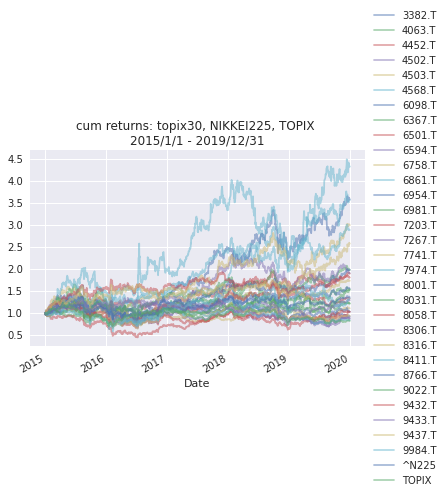

In [9]:
plt.figure(figsize=(8, 8))
# df_retcum.plot(subplot=True)
df_retcum.plot(title=f"cum returns: topix30, NIKKEI225, TOPIX \n{st} - {ed}", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

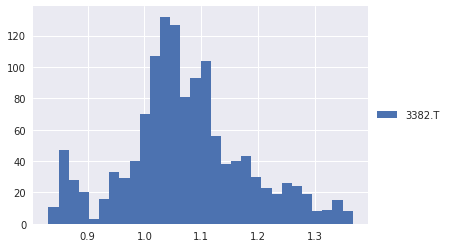

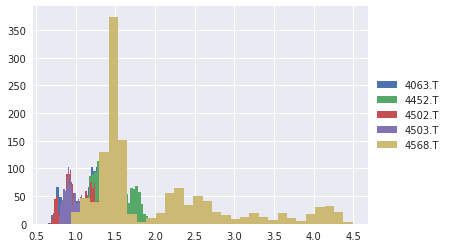

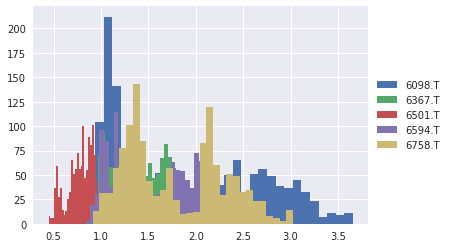

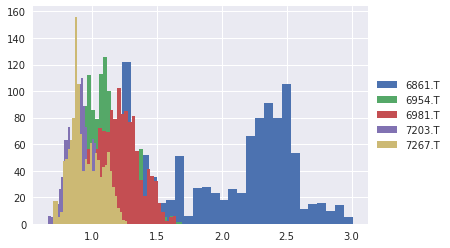

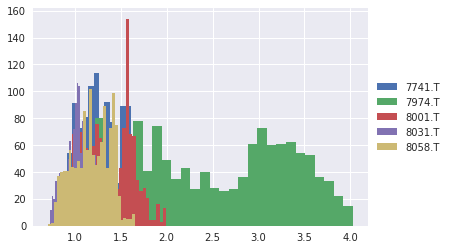

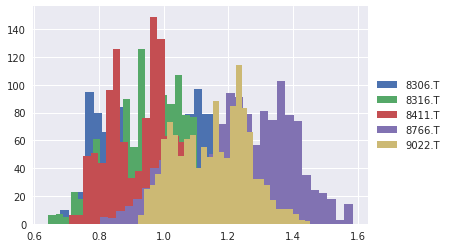

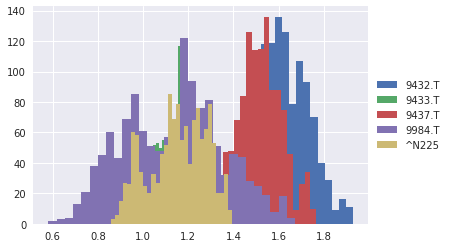

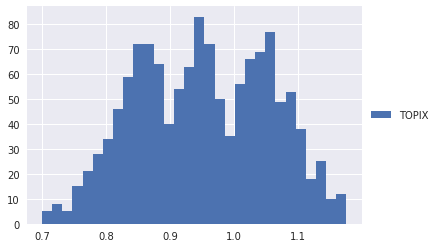

In [10]:
for idx, col in enumerate(df_retcum.columns):
    plt.hist(df_retcum[[col]].values, bins=30, label=col)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    if idx % 5 == 0:
        plt.show()

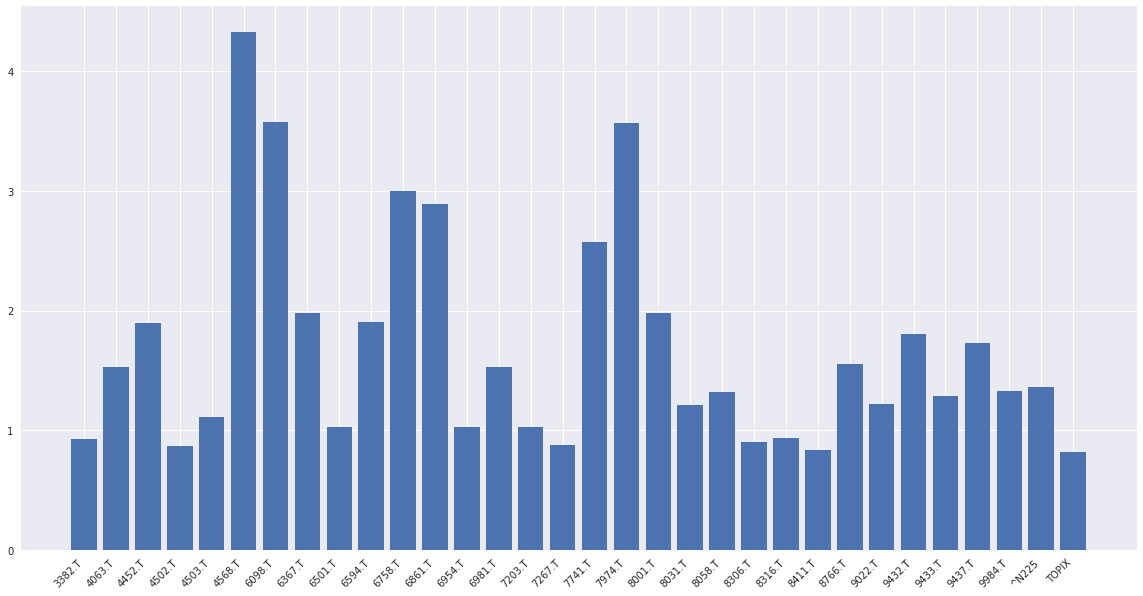

In [11]:
# cumulative returns
plt.figure(figsize=(20,10))
plt.bar(df_retcum.columns, df_retcum.iloc[-1].values)
plt.xticks(rotation=45, ha='right')
plt.show()

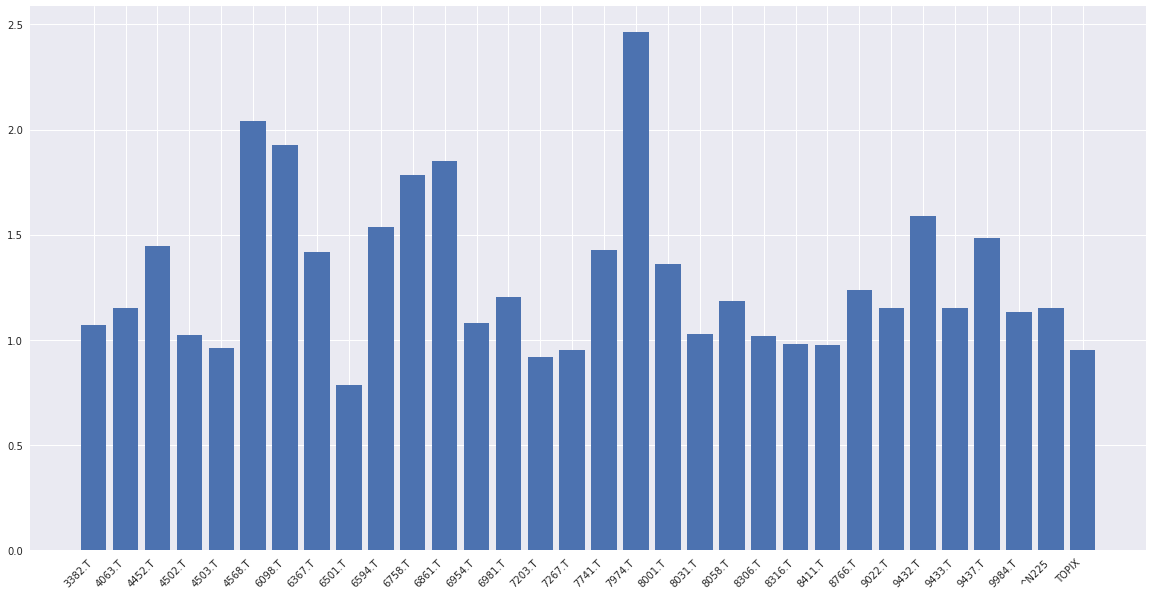

In [12]:
# expected returns
plt.figure(figsize=(20,10))
plt.bar(df_retcum.columns, df_retcum.mean().values)
plt.xticks(rotation=45, ha='right')
plt.show()

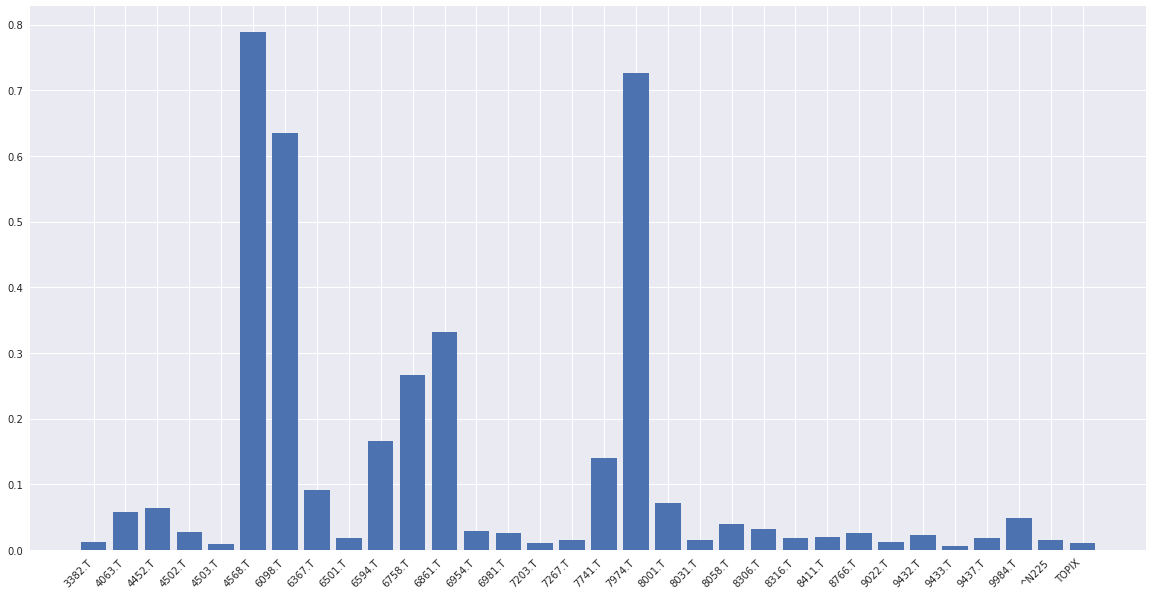

In [13]:
# variance
plt.figure(figsize=(20,10))
plt.bar(df_retcum.columns, df_retcum.var().values)
plt.xticks(rotation=45, ha='right')
plt.show()

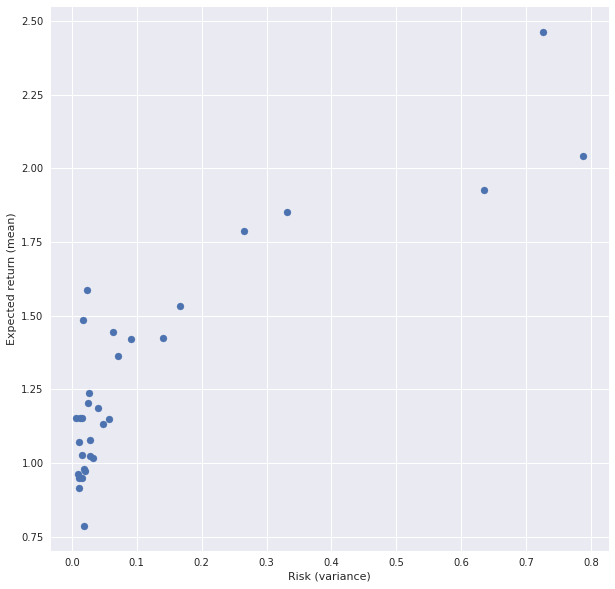

In [14]:
# return vs risk
plt.figure(figsize=(10,10))
mean = df_retcum.mean().values
var = df_retcum.var().values
plt.scatter(var, mean)
plt.xlabel("Risk (variance)")
plt.ylabel("Expected return (mean)")
plt.show()

### ポートフォリオ選択モデル

Markowitzの平均分散モデル

- $\Sigma  \in \mathbb{R}^{n \times n}$: 共分散行列
- $r  \in \mathbb{R}^{n}$: 期待収益率ベクトル
- $r_i \in \mathbb{R}$: 資産$i$の期待収益率
- $r_e \in \mathbb{R}$: 投資家の要求期待収益率
- $x \in \mathbb{R}^{n}$: 投資比率ベクトル
- $x_i \in \mathbb{R}$: 資産$i$の投資比率


$$
\begin{align}
{\rm min} ~~~ x^T \Sigma x \\
{\rm s.t.} ~~~ r^T x \geq r_e \\
{\| x \|}_{1} = 1 \\
x_i \geq 0
\end{align}
$$

*二次計画問題

![img0](https://cdn-ak.f.st-hatena.com/images/fotolife/m/meison_amsl/20161016/20161016122314.png)


参考:
- https://cvxopt.org/userguide/coneprog.html
- https://qiita.com/ryoshi81/items/8b0c6add3e367f94c828

In [15]:
import cvxopt

def cvxopt_qp_solver(r, r_e, cov):
    # CVXOPT QP Solver for Markowitz' Mean-Variance Model
    # See https://cvxopt.org/userguide/coneprog.html#quadratic-programming
    # See https://cdn.hackaday.io/files/277521187341568/art-mpt.pdf
    n = len(r)
    r = cvxopt.matrix(r)
    
    P = cvxopt.matrix(2.0 * np.array(cov))
    q = cvxopt.matrix(np.zeros((n, 1)))
    G = cvxopt.matrix(np.concatenate((-np.transpose(r), -np.identity(n)), 0))
    h = cvxopt.matrix(np.concatenate((-np.ones((1,1)) * r_e, np.zeros((n,1))), 0))
    A = cvxopt.matrix(1.0, (1, n))
    b = cvxopt.matrix(1.0)    
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    return sol

In [16]:
r = df_retcum.mean().values
r_e = 1.45
cov = np.array(df_retcum.cov())

sol = cvxopt_qp_solver(r, r_e, cov)
x_opt = np.squeeze(np.array(sol['x']))
print(x_opt)
print("min var (opt) :", sol["primal objective"])
print("r_e           :", r_e)

     pcost       dcost       gap    pres   dres
 0:  1.7443e-02 -8.5621e-01  4e+01  5e+00  1e+01
 1:  1.4371e-01 -9.2419e-01  1e+00  4e-02  1e-01
 2:  8.7798e-02 -7.5146e-02  2e-01  3e-03  1e-02
 3:  2.5601e-02 -5.2714e-02  8e-02  2e-16  2e-15
 4:  1.6198e-02  7.9788e-03  8e-03  1e-16  2e-15
 5:  1.2826e-02  8.4017e-03  4e-03  3e-16  4e-15
 6:  1.1818e-02  1.0901e-02  9e-04  2e-16  7e-15
 7:  1.1519e-02  1.1060e-02  5e-04  1e-16  4e-14
 8:  1.1289e-02  1.1273e-02  2e-05  3e-16  1e-14
 9:  1.1277e-02  1.1277e-02  2e-07  2e-16  5e-14
10:  1.1277e-02  1.1277e-02  2e-09  2e-16  4e-14
Optimal solution found.
[1.46779272e-01 1.20641302e-09 4.54063234e-09 8.93434217e-08
 1.12719703e-08 1.15289594e-09 9.24174262e-10 1.71074748e-09
 1.20695565e-09 1.30742145e-09 2.49633007e-09 1.33533030e-09
 6.21111351e-09 7.02721332e-08 4.51250893e-09 1.07654466e-08
 2.57092101e-09 1.09965082e-09 1.96961311e-09 2.31023941e-09
 4.37895232e-09 8.98887320e-09 5.51194684e-09 1.87537375e-08
 9.38154061e-09 1.02050

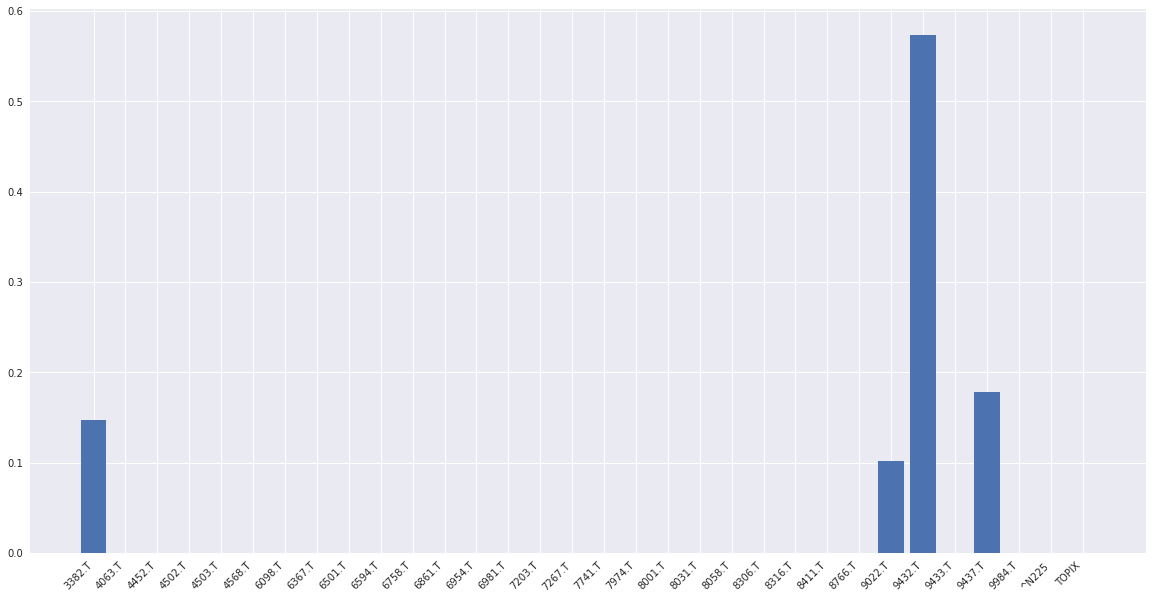

In [17]:
# Opt portfolio
plt.figure(figsize=(20,10))
plt.bar(df.columns, x_opt)
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
retmean = df_retcum.mean().values
retmean_opt = float(np.dot(retmean, x_opt))

retcum = df_retcum.iloc[-1].values
retcum_opt = float(np.dot(retcum, x_opt))

var = df_retcum.var().values
var_opt = float(np.dot(var, x_opt ** 2))

print("opt portfolio\n=============")
print("ret cum  :", retcum_opt)
print("ret mean :", retmean_opt)
print("ret var  :", var_opt)

opt portfolio
ret cum  : 1.6054384007361833
ret mean : 1.4500000003414735
ret var  : 0.008592668390422407


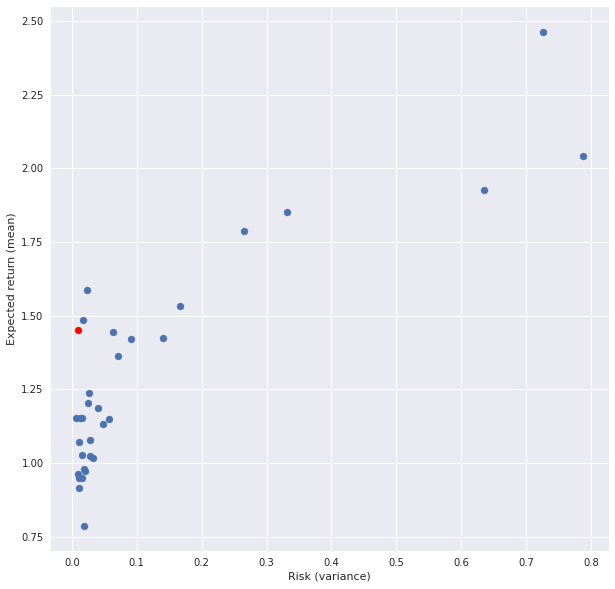

In [19]:
# return vs risk
plt.figure(figsize=(10,10))
mean = df_retcum.mean().values
var = df_retcum.var().values
plt.scatter(var, mean, marker="o")
plt.scatter(var_opt, retmean_opt, marker="o", color="red")
plt.xlabel("Risk (variance)")
plt.ylabel("Expected return (mean)")
plt.show()

In [20]:
df_retcum.iloc[-1].values.max()

4.32684493254085

In [21]:
df_retcum.iloc[-1].values.min()

0.8203208303065634